In [1]:
%matplotlib widget
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio
import pandas as pd
import scipy as sp
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pylab


from matplotlib.lines import Line2D
import matplotlib.cm as cm
params = {'legend.fontsize': 7,#'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 7,#'x-large',
         'axes.titlesize':7,#'x-large',
         'xtick.labelsize':7,#18,
         'ytick.labelsize':7}#18}
pylab.rcParams.update(params)
matplotlib.rcParams['font.family'] = ['sans-serif']
matplotlib.rcParams['font.sans-serif']='Arial'

cm = 1/2.54

## Read in simulation data

In [2]:
# inv_calc_topo_data_loc = "../COMSOL/Data/Spiral/data for paper/invariant wavelength second lab range.csv"
# inv_calc_triv_data_loc = "../COMSOL/Data/Spiral/data for paper/invariant wavelength second lab range trivial.csv"
inv_calc_topo_data_loc = "../COMSOL/Data/Spiral/data for paper/invariant wavelength lab range intensity.csv"
inv_calc_triv_data_loc = "../COMSOL/Data/Spiral/data for paper/invariant wavelength lab range intensity trivial.csv"
# Read in csv from COMSOL
data_sim_top = pd.read_csv(inv_calc_topo_data_loc, header=4,float_precision='round_trip')
data_sim_triv = pd.read_csv(inv_calc_triv_data_loc, header=4,float_precision='round_trip')

for column in data_sim_top.columns[1:]:
    if type(data_sim_top[column][0]) == str and 'i' in data_sim_top[column][0]:
        data_sim_top[column] = data_sim_top[column].str.replace('i','j').apply(lambda x: np.complex(x))

for column in data_sim_triv.columns[1:]:
    if type(data_sim_triv[column][0]) == str and 'i' in data_sim_triv[column][0]:
        data_sim_triv[column] = data_sim_triv[column].str.replace('i','j').apply(lambda x: np.complex(x))
    
polarisation = 0# 0 or 1    
data_sim_top_pol = data_sim_top.loc[polarisation::2,:].reset_index()

data_sim_triv_pol = data_sim_triv[polarisation::2]
data_sim_triv_pol2 = data_sim_triv[(1-polarisation)::2]#.loc[polarisation::2,:].reset_index()


data_sim_top_pol = data_sim_top_pol.drop(columns=['saitoh_neff', 'index'])
data_sim_triv_pol = data_sim_triv_pol.drop(columns=['saitoh_neff'])#, 'index'])
display(data_sim_top_pol)
print(np.shape(data_sim_top_pol))
print(np.shape(data_sim_triv_pol))

,% lda0 (um),lambda,Core 1 (kg^2*m^4/(s^6*A^2)),Core 2 (kg^2*m^4/(s^6*A^2)),Core 3 (kg^2*m^4/(s^6*A^2)),Core 4 (kg^2*m^4/(s^6*A^2)),Core 5 (kg^2*m^4/(s^6*A^2)),Core 6 (kg^2*m^4/(s^6*A^2)),Core 7 (kg^2*m^4/(s^6*A^2)),Core 8 (kg^2*m^4/(s^6*A^2)),Core 9 (kg^2*m^4/(s^6*A^2)),Core 10 (kg^2*m^4/(s^6*A^2)),Core 11 (kg^2*m^4/(s^6*A^2)),Core 12 (kg^2*m^4/(s^6*A^2)),Cladding (kg^2*m^4/(s^6*A^2)),Propagation constant (rad/m)
0,0.597,1.457085,4.712664e-08,6.996086e-07,1.123629e-06,2.103970e-06,2.356844e-06,2.674103e-06,2.595831e-06,2.093986e-06,1.786819e-06,9.510626e-07,5.953764e-07,4.970832e-08,0.000003,1.533523e+07
1,0.597,1.457088,1.976604e-07,1.907190e-06,2.483019e-06,2.140609e-06,1.425697e-06,2.607953e-08,8.515675e-08,1.644477e-06,2.305871e-06,2.566341e-06,1.945162e-06,1.989479e-07,0.000003,1.533527e+07
2,0.597,1.457093,3.645455e-07,2.724659e-06,2.449863e-06,2.588713e-08,2.253557e-07,2.753244e-06,2.723517e-06,1.406315e-07,6.520413e-08,2.467886e-06,2.658095e-06,3.401758e-07,0.000003,1.533532e+07
3,0.597,1.457099,4.507408e-07,2.258557e-06,1.099834e-06,1.811505e-06,2.698798e-06,8.665832e-08,1.759688e-07,2.699320e-06,1.752683e-06,1.180201e-06,2.335381e-06,4.744200e-07,0.000003,1.533539e+07
4,0.597,1.457105,2.870365e-07,8.736681e-07,1.687600e-07,2.342837e-06,1.533091e-06,2.770465e-06,2.839899e-06,1.625668e-06,2.493403e-06,1.991138e-07,9.410825e-07,3.006782e-07,0.000003,1.533545e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.677,1.454566,3.271134e-07,8.368324e-07,1.750142e-07,1.950822e-06,1.323570e-06,2.025748e-06,2.154440e-06,8.025098e-07,1.351583e-06,9.745226e-08,4.972602e-07,1.917994e-07,0.000003,1.349971e+07
392,0.677,1.454572,2.907837e-07,1.361982e-06,6.958533e-07,9.626454e-07,1.608493e-06,2.303333e-07,2.484867e-08,1.742122e-06,1.109349e-06,1.097451e-06,1.987066e-06,3.906077e-07,0.000003,1.349978e+07
393,0.677,1.454579,2.408366e-07,1.604428e-06,1.470865e-06,6.603170e-08,1.070131e-07,1.829499e-06,1.893103e-06,3.110186e-07,1.065351e-07,1.545434e-06,1.764684e-06,2.598972e-07,0.000003,1.349984e+07
394,0.677,1.454585,1.748362e-07,1.799608e-06,2.313359e-06,1.925796e-06,1.371764e-06,1.480392e-07,7.707385e-08,9.740013e-07,1.349513e-06,1.154670e-06,8.362638e-07,8.028152e-08,0.000003,1.349990e+07


(396, 16)
(396, 16)


## Defining functions for propagation

In [3]:
# function to take input vector, 
# overlap with eigvals to describe as supermodes,
# then propagate using z dependence

def super_mode(z,evals,evecs,input_vec):
    psi_list = np.zeros([len(evals),len(evals)],dtype=complex)
    # overlap input vec with all eigenvecs to build supermode
    for i,val in enumerate(evals):
        ind_vec = evecs[:,i]
        psi_list[:,i] = np.vdot(ind_vec,input_vec)*ind_vec*np.exp(1.0j*val*z)
    # sum up supermode contributions after propagation
    psi = np.sum(psi_list,axis=1)
    return psi

# Function to compute overlap to return to core basis for plotting
def core_basis(prop_wave, number_of_cores):
    
    core_matrix = np.eye(number_of_cores) 
    a_list = np.zeros(number_of_cores, dtype=complex)
    
    for i in range(number_of_cores):
        a_list[i] = np.vdot(core_matrix[:,i],prop_wave)
        
    # We find the contribution from each core through these overlaps
    return a_list

# Function to find weigthed intensity difference at a given distance
def I_d_bar(z,evals,evecs,input_vec):
    # find supermodes
    supe = super_mode(z,evals,evecs,input_vec)
    a_vals = core_basis(supe,N)
    # Intensity in each core
    norm_vals = a_vals*np.conj(a_vals)
#     print(norm_vals)
    norm_vals = norm_vals/np.sum(norm_vals)
    # split cores into a & b
    a_norm = norm_vals[::2]
    b_norm = norm_vals[1::2]
    # find unweighted difference
    diff_list = a_norm - b_norm
    # weight the difference
    scaled_diff_list = diff_list*np.arange(1,7)
    # Calculate final values for use
    I_d = np.sum(scaled_diff_list)
    unweighted_diff = np.sum(diff_list)
#     fig_bar = plt.figure(figsize=(10*cm, 8*cm))
#     ax_bar= fig_bar.add_subplot(111)
#     ax_bar.bar(np.arange(1,13), norm_vals)
    
    
    return I_d,unweighted_diff,norm_vals

# Calculate the $I_{d}$ for each input core, at a given distance $z$

In [4]:
N = 12
def I_d_lambda_list(input_core, distance, wvln_list, topo_df, triv_df):
    a_1 = np.zeros(N)
    a_1[input_core] = 1

    intensities_top = []
    # intensities_top_pol2 = []
    intensities_triv = []
    # intensities_triv_pol2 = []

    I_list_top_com = np.zeros(len(wvln_list),dtype=complex)
    # I_list_top_com_pol2 = np.zeros(len(wvln_list),dtype=complex)
    I_list_triv_com = np.zeros(len(wvln_list),dtype=complex)
    # I_list_triv_com_pol2 = np.zeros(len(wvln_list),dtype=complex)
    unweighted_diff_top = np.zeros(len(wvln_list),dtype=complex)
    unweighted_diff_triv = np.zeros(len(wvln_list),dtype=complex)
    # unweighted_diff_top_pol2 = np.zeros(len(wvln_list),dtype=complex)
    # unweighted_diff_triv_pol2 = np.zeros(len(wvln_list),dtype=complex)

    for j,wvln in enumerate(wvln_list):
        # Just select dataframes with a given wavelength
        top_data = topo_df[topo_df['% lda0 (um)'] == wvln]
    #         top_data_pol2 = data_sim_top_pol2[data_sim_top_pol2['% lda0 (um)'] == wvln]
    #     print(top_data)
        triv_data = triv_df[triv_df['% lda0 (um)'] == wvln]
    #         triv_data_pol2 = data_sim_triv_pol2[data_sim_triv_pol2['% lda0 (um)'] == wvln]
        # collect the propagation constants 
        beta_vals = top_data['Propagation constant (rad/m)'].to_numpy()
        triv_beta_vals = triv_data['Propagation constant (rad/m)'].to_numpy()
    #         beta_vals_pol2 = top_data_pol2['Propagation constant (rad/m)'].to_numpy()
    #         triv_beta_vals_pol2 = triv_data_pol2['Propagation constant (rad/m)'].to_numpy()
        # Build matrices containing eigenvectors
        top_a_list = top_data.iloc[:,2:-2].to_numpy()#
        triv_a_list = triv_data.iloc[:,2:-2].to_numpy()
    #         top_a_list_pol2 = top_data_pol2.iloc[:,2:-2].to_numpy()#
    #         triv_a_list_pol2 = triv_data_pol2.iloc[:,2:-2].to_numpy()

        a_eig_vecs = top_a_list.T
        triv_a_eig_vecs = triv_a_list.T
    #         a_eig_vecs_pol2 = top_a_list_pol2.T
    #         triv_a_eig_vecs_pol2 = triv_a_list_pol2.T
    #     print(a_eig_vecs)

        norm_vecs_top = np.zeros([len(beta_vals),len(beta_vals)], dtype=complex)
        norm_vecs_triv = np.zeros([len(triv_beta_vals),len(triv_beta_vals)], dtype=complex)
    #         norm_vecs_top_pol2 = np.zeros([len(beta_vals_pol2),len(beta_vals_pol2)], dtype=complex)
    #         norm_vecs_triv_pol2 = np.zeros([len(triv_beta_vals_pol2),len(triv_beta_vals_pol2)], dtype=complex)
        # Normalising integrated E-Field from COMSOL
        for i in range(len(beta_vals)):
            norm_vecs_top[:,i] = a_eig_vecs[:,i]/np.sqrt(np.vdot(a_eig_vecs[:,i],a_eig_vecs[:,i]))
            norm_vecs_triv[:,i] = triv_a_eig_vecs[:,i]/np.sqrt(np.vdot(triv_a_eig_vecs[:,i], triv_a_eig_vecs[:,i]))
    #             norm_vecs_top_pol2[:,i] = a_eig_vecs_pol2[:,i]/np.sqrt(np.vdot(a_eig_vecs_pol2[:,i],a_eig_vecs_pol2[:,i]))
    #             norm_vecs_triv_pol2[:,i] = triv_a_eig_vecs_pol2[:,i]/np.sqrt(np.vdot(triv_a_eig_vecs_pol2[:,i], triv_a_eig_vecs_pol2[:,i]))

        I_list_top_com[j], unweighted_diff_top[j], intensity_list_top = I_d_bar(distance,beta_vals,norm_vecs_top,a_1) 
        I_list_triv_com[j], unweighted_diff_triv[j], intensity_list_triv = I_d_bar(distance,triv_beta_vals,norm_vecs_triv,a_1)
    #         I_list_top_com_pol2[j], unweighted_diff_top_pol2[j], intensity_list_top_pol2 = I_d_bar(z,beta_vals_pol2,norm_vecs_top_pol2,a_1) 
    #         I_list_triv_com_pol2[j], unweighted_diff_triv_pol2[j], intensity_list_triv_pol2 = I_d_bar(z,triv_beta_vals_pol2,norm_vecs_triv_pol2,a_1)

        intensities_top.append(intensity_list_top)
        intensities_triv.append(intensity_list_triv)    
    #         intensities_top_pol2.append(intensity_list_top_pol2)
    #         intensities_triv_pol2.append(intensity_list_triv_pol2)


    #     I_list_triv_avg = (I_list_triv_com+I_list_triv_com_pol2)/2
    # print('Input core {}'.format(input_core))
    # print('Trivial Winding: {:.2f}'.format(2*np.real(np.mean(I_list_triv_com))))
    # print('Topological Winding: {:.2f}'.format(2*np.real(np.mean(I_list_top_com))))
    return I_list_top_com, I_list_triv_com


In [5]:
wvlns = np.unique(data_sim_top_pol['% lda0 (um)'].to_numpy())
uniform_weighted_top, uniform_weighted_triv = I_d_lambda_list(5, 0.4, wvlns, data_sim_top_pol, data_sim_triv_pol)
subsection_top = uniform_weighted_top[:-8]
print(wvlns[:-8])
print(np.mean(uniform_weighted_top))
print(np.ptp(wvlns[:-8]))
## Plotting wavelength distribution



[0.597  0.5995 0.602  0.6045 0.607  0.6095 0.612  0.6145 0.617  0.6195
 0.622  0.6245 0.627  0.6295 0.632  0.6345 0.637  0.6395 0.642  0.6445
 0.647  0.6495 0.652  0.6545 0.657 ]
(0.594303529286156+0j)
0.06000000000000005


In [6]:
def weighting_func(lambdas):
    mean = np.mean(lambdas)
    std = np.std(lambdas)
    y_out = 1/(std*np.sqrt(2*np.pi)) * np.exp(- (lambdas - mean)**2 / (2*std**2))
    weight_ratio = np.sum(y_out)/len(lambdas)
    return y_out/weight_ratio

In [7]:
# fig_weights = plt.figure(figsize=(10*cm, 10*cm))
# ax_weights = fig_weights.add_subplot(111)
y_uniform = np.ones(len(wvlns))#*1/len(wvlns)
y_norm = weighting_func(wvlns)
y_norm_sub = weighting_func(wvlns[:-8])
y_uniform_sub = np.ones(len(wvlns[:-8]))
# ax_weights.scatter(wvlns, uniform_weighted_top)
# ax_weights.axhline(np.mean(uniform_weighted_top))
# ax_weights.scatter(wvlns, np.multiply(uniform_weighted_top,y_of_weights))
# ax_weights.scatter(wvlns, np.multiply(uniform_weighted_top,y_norm))
# ax_weights.scatter(wvlns, y_of_weights)
# ax_weights.scatter(wvlns, y_norm)
# plt.show()
print(2*np.mean(np.multiply(uniform_weighted_top, y_uniform)))
print(2*np.mean(np.multiply(uniform_weighted_top, y_norm)))
print(2*np.mean(np.multiply(subsection_top, y_norm_sub)))
print(2*np.mean(np.multiply(subsection_top, y_uniform_sub)))


(1.188607058572312+0j)
(1.187944910081728+0j)
(1.180826214624305+0j)
(1.1853058223911808+0j)


## Plotting winding number against wavelength for a chosen core

In [15]:
chosen_input_core = 4
rand_z_list = np.sort(np.random.randint(20, high=50, size=20))/100
z_range = np.linspace(0.0,1.5,1000)
id_list = []
id_list_triv = []
for dist in rand_z_list:
    top, triv = I_d_lambda_list(chosen_input_core, dist, wvlns, data_sim_top_pol, data_sim_triv_pol)
    id_list.append(np.mean(np.multiply(top[:-8], y_uniform_sub)))
    id_list_triv.append(np.mean(np.multiply(triv[:-8], y_uniform_sub)))

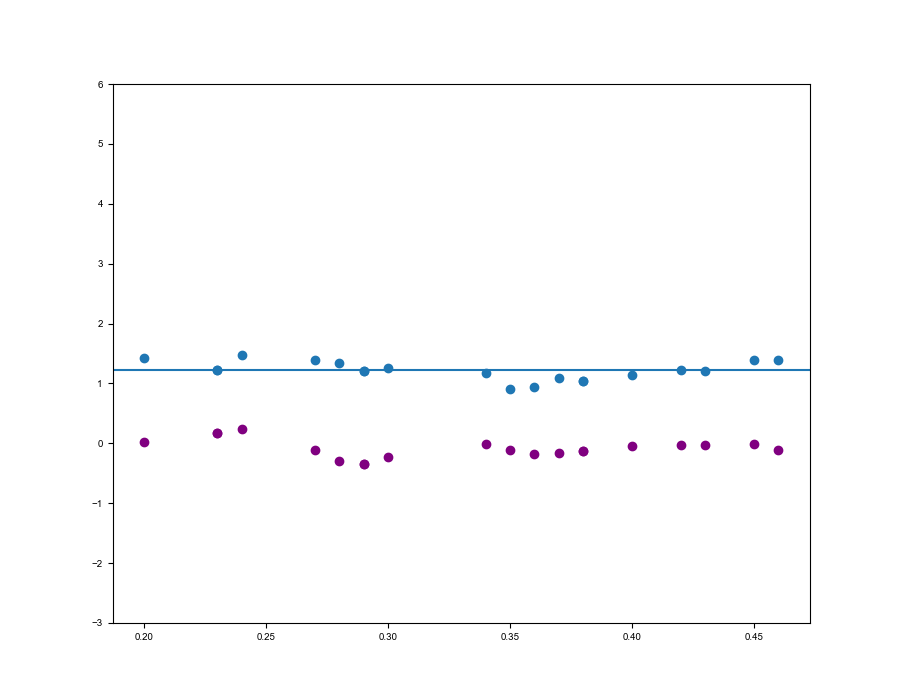

In [16]:
fig_winding_dist = plt.figure(figsize=(9,7))
ax_winding_dist = fig_winding_dist.add_subplot(111)

ax_winding_dist.scatter(rand_z_list, np.multiply(id_list,2))
ax_winding_dist.scatter(rand_z_list, np.multiply(id_list_triv,2), color='purple')
ax_winding_dist.axhline(np.mean(np.multiply(id_list,2)))
ax_winding_dist.set_ylim(-3,6)
plt.show()

In [5]:

osa_data = pd.read_csv('../Fibre Design/Single Shot Data/nathan_flat_spectra_7_11.csv', names=['Wavelength (nm)', 'Intensity'], skiprows=39, float_precision='round_trip')
display(osa_data)

,Wavelength (nm),Intensity
0,590.0000,-4.243000e-09
1,590.2000,1.701000e-08
2,590.4000,-2.894000e-09
3,590.6000,8.569000e-09
4,590.8000,-6.771000e-09
...,...,...
496,689.2000,1.934000e-10
497,689.4000,-3.336000e-09
498,689.6000,-4.705000e-10
499,689.8000,5.362000e-11


59.0


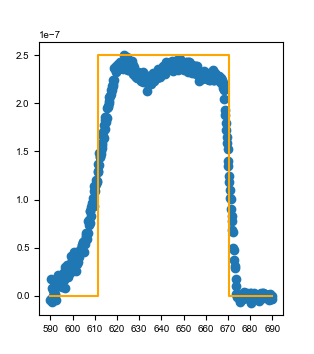

In [6]:
fig_osa = plt.figure(figsize=(8*cm, 9*cm))
ax_osa = fig_osa.add_subplot(111)
intensity_list = osa_data['Intensity'].to_numpy()
wvln_list_osa = [float(i) for i in osa_data['Wavelength (nm)']]
ax_osa.scatter(wvln_list_osa, intensity_list)
half_max = np.max(osa_data['Intensity'])/2.0
# ax_osa.axhline(half_max)
diff_list = np.abs(intensity_list - half_max).argsort()
print(wvln_list_osa[diff_list[0]] - wvln_list_osa[diff_list[1]])
ax_osa.set_xticks(np.arange(590, 700, 10))
ax_osa.plot([wvln_list_osa[0], wvln_list_osa[diff_list[1]], wvln_list_osa[diff_list[1]], wvln_list_osa[diff_list[0]], wvln_list_osa[diff_list[0]] , wvln_list_osa[-1]],
            [0, 0,np.max(intensity_list), np.max(intensity_list), 0, 0], color='orange')
plt.show()

In [38]:
print(intensity_list[diff_list[0]])

1.245e-07
